In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
flight_df = pd.read_excel('Data_Train.xlsx')
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
len(flight_df['Route'].unique())

129

In [5]:
#Filling the missing values with mode
mode_route = flight_df['Route'].mode()[0]
flight_df['Route'] = flight_df['Route'].fillna(mode_route)

In [6]:
flight_df['Total_Stops'] = flight_df['Total_Stops'].fillna(flight_df['Total_Stops'].mode()[0])

In [7]:
flight_df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [8]:
flight_df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [9]:
flight_df['Destination']=flight_df['Destination'].map(lambda x: x.replace('New Delhi', 'Delhi'))

In [10]:
flight_df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [11]:
flight_df['Date_of_Journey']= pd.to_datetime(flight_df['Date_of_Journey'],format= '%d/%m/%Y')

In [12]:
flight_df['Journey_Day'] = flight_df['Date_of_Journey'].dt.day
flight_df['Journey_Month'] = flight_df['Date_of_Journey'].dt.month
flight_df['Year'] = flight_df['Date_of_Journey'].dt.year

In [13]:
#dropping the year column as only 2019 data is there
flight_df.drop('Year',axis=1,inplace=True)

In [14]:
flight_df.drop('Date_of_Journey', axis=1, inplace=True)

In [15]:
flight_df['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
12:05      1
04:15      1
16:25      1
12:45      1
04:50      1
Name: Dep_Time, Length: 222, dtype: int64

In [16]:
flight_df["Departure_hour"] = pd.to_datetime(flight_df["Dep_Time"]).dt.hour

# Extracting Minutes
flight_df["Departure_min"] = pd.to_datetime(flight_df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
flight_df.drop(["Dep_Time"], axis = 1, inplace = True)

In [17]:
month_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr', 5:'May', 6:'June',7:'July',8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'}
flight_df['Month']=flight_df['Journey_Month'].map(month_dict)
flight_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_min,Month
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,Mar
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,May
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,June
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,May
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,Mar


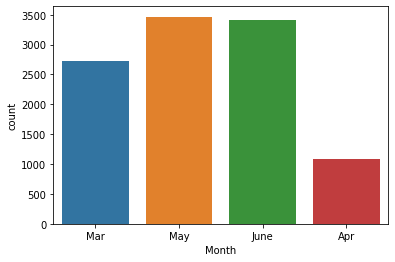

In [18]:
sns.countplot('Month', data = flight_df)

The buisiest months seemns to be May and June, generally in india is a holiday time

In [19]:
def getDurationinMins(df,col, duration_col):
    for i in range(len(df[col])):
    
        if len(df[col][i].split())==2:
           if('h' in df[col][i].split()[0]):
               hours = int(df[col][i].split()[0].split('h')[0])*60
           if ('m' in df[col][i].split()[1]):
               minutes = int(df[col][i].split()[1].split('m')[0])
        else:
           if('h' in df[col][i].split()[0]):
               hours = int(df[col][i].split()[0].split('h')[0])*60
           else:
               minutes = int(df[col][i].split()[0].split('m')[0])
        df.loc[i, duration_col] = hours + minutes
                


In [20]:
flight_df['duration'] = np.NaN

getDurationinMins(flight_df, 'Duration', 'duration')

In [21]:
flight_df.drop('Duration',axis=1, inplace=True)

In [22]:
flight_df["Arrival_hour"] = pd.to_datetime(flight_df.Arrival_Time).dt.hour

# Extracting Minutes
flight_df["Arrival_min"] = pd.to_datetime(flight_df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
flight_df.drop(["Arrival_Time"], axis = 1, inplace = True)

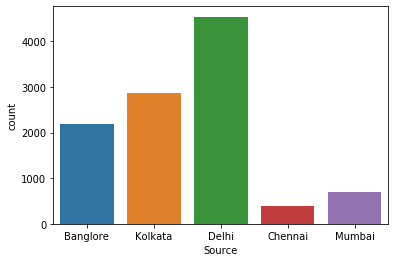

In [23]:
sns.countplot('Source', data=flight_df)

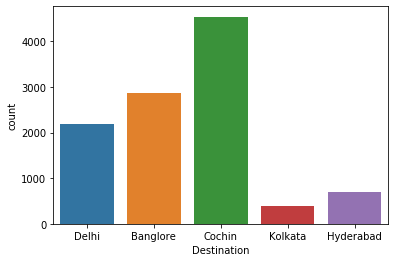

In [24]:
sns.countplot('Destination', data=flight_df)

In [25]:
flight_df['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

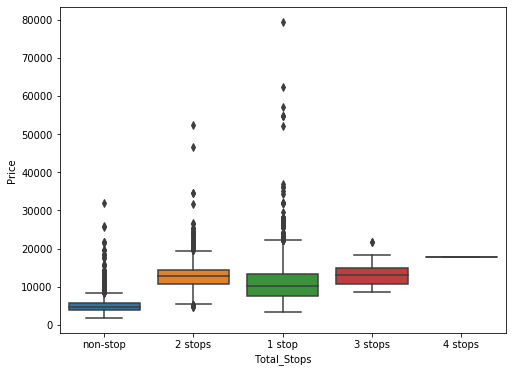

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot('Total_Stops', 'Price', data=flight_df)

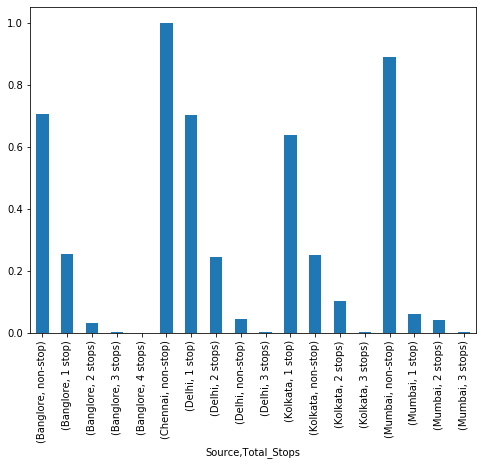

In [27]:
flight_df.groupby('Source')['Total_Stops'].value_counts(normalize=True).plot(kind='bar', figsize=(8,6))

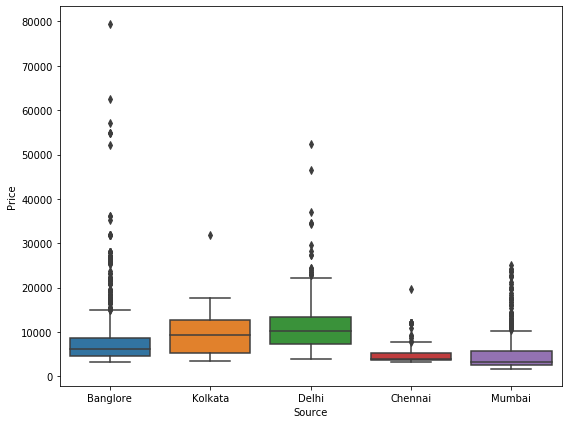

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot('Source','Price', data=flight_df)
plt.tight_layout()

In [29]:
#df = flight_df.copy()
#states = 
#lower_bound = df[df['Source']=='Banglore']['Price'].quantile(0.05)
#higher_bound = df[df['Source']=='Banglore']['Price'].quantile(0.95)
#df[(df['Price']>lower_bound ) & (df['Price'] < higher_bound) & (df['Source']=='Banglore')]['Price'].hist()

In [30]:
#states = flight_df['Source'].value_counts().index.tolist()
#lower_bound, higher_bound =[], []
#for i in range(len(states)):
#    lower_bound.append( flight_df[flight_df['Source']==states[i]]['Price'].quantile(0.05))
#    higher_bound.append(flight_df[flight_df['Source']==states[i]]['Price'].quantile(0.95))

In [31]:
#fig, axes = plt.subplots(2,2, figsize=(10,8))
#axes = axes.ravel()
#color = ['orange', 'green', 'red', 'purple']
#for idx, ax in enumerate(axes):
#    flight_df=flight_df[(flight_df['Price']>lower_bound[idx] ) & (flight_df['Price'] < higher_bound[idx]) & (flight_df['Source']==states[idx])]
#    ax.hist(flight_df[(flight_df['Source']==states[idx])]['Price'], color=color[idx])
#    ax.set_xlabel(states[idx])
#plt.tight_layout()

In [32]:
#routes and additional stops are the same
flight_df.drop('Route', axis=1, inplace=True)
flight_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_min,Month,duration,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897,24,3,22,20,Mar,170.0,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,May,445.0,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,June,1165.0,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,May,325.0,23,30
4,IndiGo,Banglore,Delhi,1 stop,No info,13302,1,3,16,50,Mar,285.0,21,35


In [33]:
flight_df['Total_Stops'].value_counts(normalize=True)

1 stop      0.526631
non-stop    0.326781
2 stops     0.142282
3 stops     0.004212
4 stops     0.000094
Name: Total_Stops, dtype: float64

In [34]:
stop_list = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
flight_df['Total_Stops'] =flight_df['Total_Stops'].map(stop_list)
flight_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_min,Month,duration,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,0,No info,3897,24,3,22,20,Mar,170.0,1,10
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,May,445.0,13,15
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,June,1165.0,4,25
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,May,325.0,23,30
4,IndiGo,Banglore,Delhi,1,No info,13302,1,3,16,50,Mar,285.0,21,35


In [35]:
flight_df['Additional_Info'].value_counts(normalize=True)

No info                         0.781148
In-flight meal not included     0.185528
No check-in baggage included    0.029954
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: Additional_Info, dtype: float64

In [36]:
flight_df.drop('Additional_Info', axis=1, inplace=True)

In [37]:
flight_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Departure_hour,Departure_min,Month,duration,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,Mar,170.0,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,May,445.0,13,15
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,June,1165.0,4,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,May,325.0,23,30
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,Mar,285.0,21,35


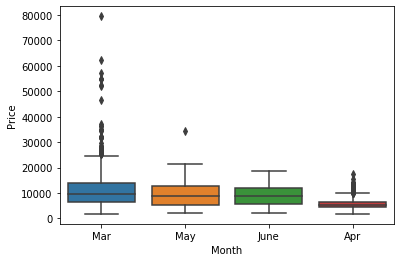

In [38]:
sns.boxplot('Month', 'Price', data= flight_df)

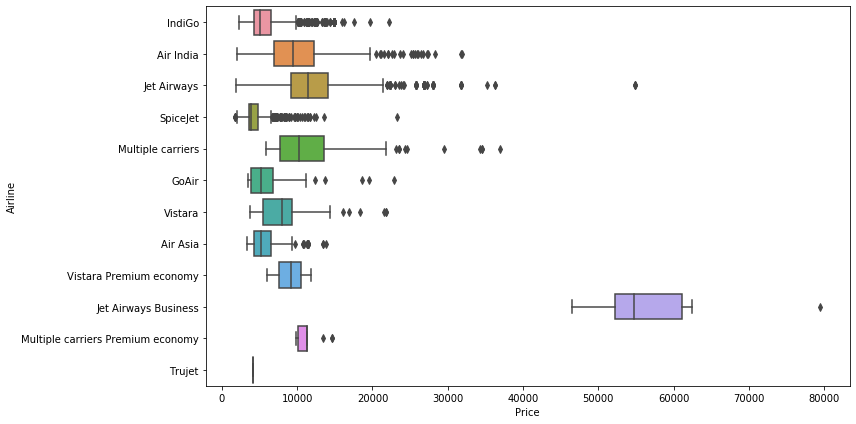

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot('Price', 'Airline', data= flight_df)
plt.tight_layout()

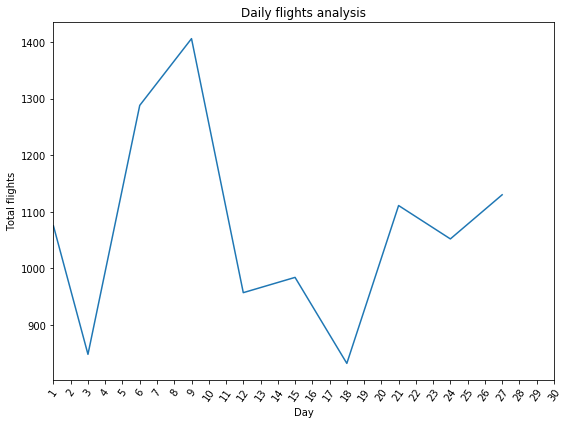

In [40]:
plt.figure(figsize=(8,6))
flights_by_day = flight_df.groupby('Journey_Day').size()
plot_by_day = flights_by_day.plot(title='Daily flights',xticks=(range(1,31)),rot=55)
plot_by_day.set_xlabel('Day')
plot_by_day.set_ylabel('Total flights')
plt.title("Daily flights analysis")
plt.tight_layout()

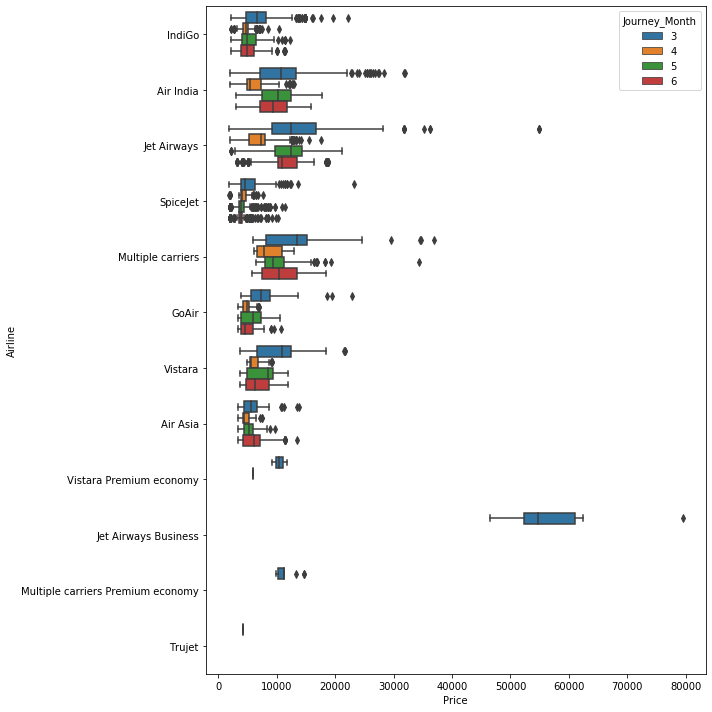

In [41]:
plt.figure(figsize=(10,10))
sns.boxplot('Price', 'Airline', data= flight_df, hue='Journey_Month')
plt.tight_layout()

The mean prices of the March month were always higher for all the airlines and some of the airlines did not have any sales during the rest of the months

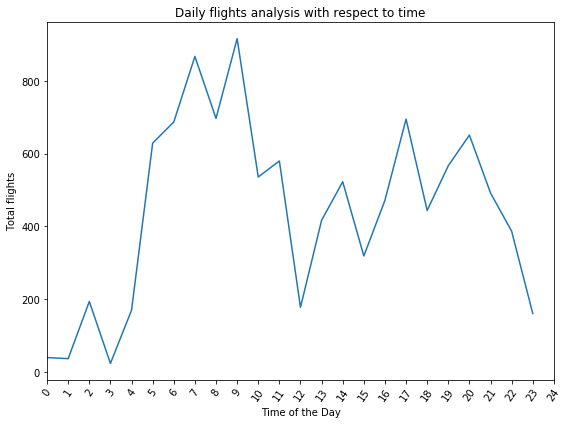

In [42]:
plt.figure(figsize=(8,6))
flights_by_hour = flight_df.groupby('Departure_hour').size()
plot_by_day = flights_by_hour.plot(title='Daily flights',xticks=(range(0,25)),rot=55)
plot_by_day.set_xlabel('Time of the Day')
plot_by_day.set_ylabel('Total flights')
plt.title("Daily flights analysis with respect to time")
plt.tight_layout()

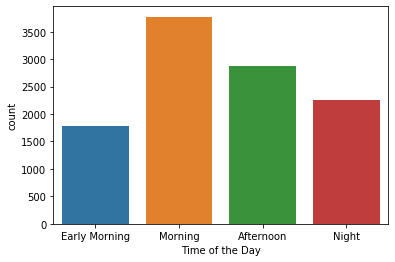

In [43]:
bins  =   [0,7,13,19,24]
labels = ['Early Morning', 'Morning','Afternoon','Night']
flight_df['Time of the Day'] = pd.cut(flight_df['Departure_hour'],right=False , bins= bins,labels = labels)
sns.countplot('Time of the Day', data=flight_df)

People generally don't prefer the early morning flights as involves loosing of sleep. Most of the people prefer morning flights and afternoon flights`

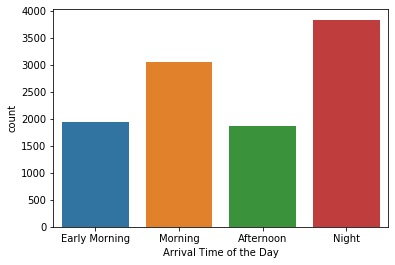

In [44]:
bins  =   [0,7,13,19,24]
labels = ['Early Morning', 'Morning','Afternoon','Night']
flight_df['Arrival Time of the Day'] = pd.cut(flight_df['Arrival_hour'],right=False , bins= bins,labels = labels)
sns.countplot('Arrival Time of the Day', data=flight_df)

 Looking at the graph, it semms that majority of the flights board the airport in the mornings after 6 or in the nights after 7

In [45]:
flight_df = flight_df.drop(flight_df[flight_df['Airline'] == 'Trujet'].index)

cat_data = ['Airline', 'Source','Destination']

dummy =pd.get_dummies(flight_df[cat_data], drop_first=True)

flight_data_df = pd.concat([flight_df.drop(cat_data,axis=1),dummy],axis=1)

flight_data_df.drop('Month', axis=1, inplace=True)


In [49]:
flight_data_df.drop(['Arrival Time of the Day', 'Time of the Day'], axis=1, inplace=True)

# Test Data

In [74]:
test_data = pd.read_excel("Test_set.xlsx")

In [75]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [76]:
test_data['Date_of_Journey']= pd.to_datetime(test_data['Date_of_Journey'],format= '%d/%m/%Y')
test_data['Journey_Month'] = test_data['Date_of_Journey'].dt.month
test_data["Journey_day"] = test_data['Date_of_Journey'].dt.day
test_data.drop('Date_of_Journey', axis=1, inplace=True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [77]:
month_dict_test = {1:'Jan',2:'Feb',3:'Mar',4:'Apr', 5:'May', 6:'June',7:'July',8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'}
test_data['Month']=test_data['Journey_Month'].map(month_dict_test)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,June
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20,May
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0,May
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,5,21,8,0,21,0,May
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6,24,23,55,2,45,June


In [78]:
test_data['duration'] = np.NaN

getDurationinMins(test_data, 'Duration', 'duration')

In [79]:
test_data.drop('Duration',axis=1, inplace=True)
test_data.drop('Route', axis=1, inplace=True)
test_data.drop('Additional_Info', axis=1, inplace=True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_Month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Month,duration
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,June,655.0
1,IndiGo,Kolkata,Banglore,1 stop,5,12,6,20,10,20,May,295.0
2,Jet Airways,Delhi,Cochin,1 stop,5,21,19,15,19,0,May,1425.0
3,Multiple carriers,Delhi,Cochin,1 stop,5,21,8,0,21,0,May,825.0
4,Air Asia,Banglore,Delhi,non-stop,6,24,23,55,2,45,June,170.0


In [80]:
stop_list = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
test_data['Total_Stops'] =test_data['Total_Stops'].map(stop_list)
test_data.head()


,Airline,Source,Destination,Total_Stops,Journey_Month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Month,duration
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,June,655.0
1,IndiGo,Kolkata,Banglore,1,5,12,6,20,10,20,May,295.0
2,Jet Airways,Delhi,Cochin,1,5,21,19,15,19,0,May,1425.0
3,Multiple carriers,Delhi,Cochin,1,5,21,8,0,21,0,May,825.0
4,Air Asia,Banglore,Delhi,0,6,24,23,55,2,45,June,170.0


In [82]:
test_data.Destination =  test_data.Destination.map(lambda x: x.replace('New Delhi', 'Delhi'))

In [87]:
cat_data = ['Airline', 'Source','Destination']

dummy =pd.get_dummies(test_data[cat_data], drop_first=True)

test_data_df = pd.concat([test_data.drop(cat_data,axis=1),dummy],axis=1)

test_data_df.drop('Month', axis=1, inplace=True)

test_data_df.head()

,Total_Stops,Journey_Month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration,Airline_Air India,Airline_GoAir,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,6,6,17,30,4,25,655.0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,5,12,6,20,10,20,295.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,5,21,19,15,19,0,1425.0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,5,21,8,0,21,0,825.0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,6,24,23,55,2,45,170.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
X  = flight_data_df.drop('Price',axis=1)
y = flight_data_df['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

C:\Users\320009177\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [52]:
predictions = reg_rf.predict(X_test)

In [53]:
print("Accuracy of Random Forest : {:.2f}".format(reg_rf.score(X_train, y_train)))

Accuracy of Random Forest : 0.95


In [54]:
print("Accuracy of Random Forest : {:.2f}".format(reg_rf.score(X_test, y_test)))

Accuracy of Random Forest : 0.79


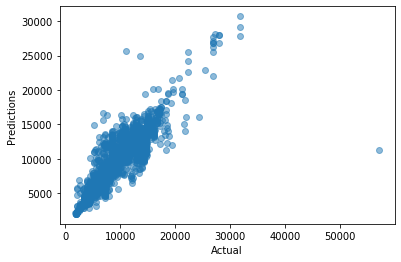

In [55]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.show()

In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1175.3313834109529
MSE: 4333125.690042067
RMSE: 2081.6161245633325


In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 20, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [91]:
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth': max_depth,
              'min_samples_split' :min_samples_split,
              'min_samples_leaf' : min_samples_leaf   
}

In [92]:
rfr_randomized = RandomizedSearchCV(estimator=reg_rf, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error',verbose=2, random_state=42, n_jobs=-1)

In [93]:
rfr_randomized.fit(X_train, y_train )

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [94]:
rfr_randomized.best_params_

{'n_estimators': 900,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 16}

In [95]:
rfr_randomized.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, n_estimators=900,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [96]:
regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, n_estimators=900,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [97]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, n_estimators=900,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [98]:
y_pred = regressor.predict(X_test)

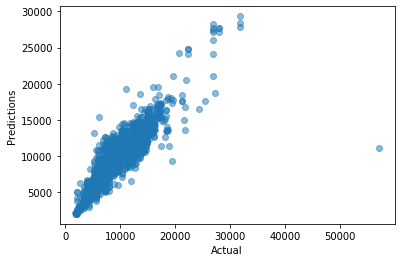

In [99]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.show()

In [100]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1134.9534636425276
MSE: 3633547.4239617214
RMSE: 1906.186618346095


In [101]:
print('R2 Score: {}'.format( metrics.r2_score(y_test,y_pred)) )

R2 Score: 0.8207246500739045


In [58]:
from sklearn.ensemble import ExtraTreesRegressor

In [59]:
param_grid = {"n_estimators" : [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
              
              "max_features" : ['auto', 'sqrt'],
              
              "min_samples_split" : [2,5,10, 15, 100]
    
}

In [60]:
ext_reg = ExtraTreesRegressor()
extra_randomized = RandomizedSearchCV(estimator=ext_reg, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error',verbose=2, random_state=42, n_jobs=-1)
extra_randomized.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=ExtraTreesRegressor(bootstrap=False,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators='warn',
                                                 n_jobs=None, oob_score=False,
                                                 random_state=None, verbose=0,
         

In [61]:
extra_randomized.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=15,
                    min_weight_fraction_leaf=0.0, n_estimators=1000,
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [62]:
extra_randomized.best_params_

{'n_estimators': 1000, 'min_samples_split': 15, 'max_features': 'auto'}

In [63]:
extraTree_regressor = ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=10,
                    min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [64]:
extraTree_regressor.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=10,
                    min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [65]:
extra_tree_predictions = extraTree_regressor.predict(X_test)

In [66]:
print("Training Accuracy:{:.2f}".format(extraTree_regressor.score(X_train, y_train)*100))
print("Testing Accuracy:{:.2f}".format(extraTree_regressor.score(X_test, y_test)*100))

Training Accuracy:92.29
Testing Accuracy:87.92


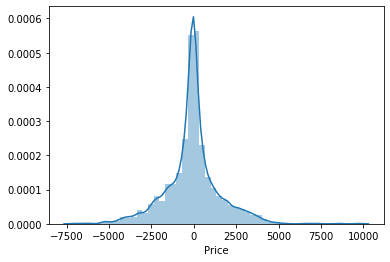

In [67]:
sns.distplot(y_test-extra_tree_predictions)

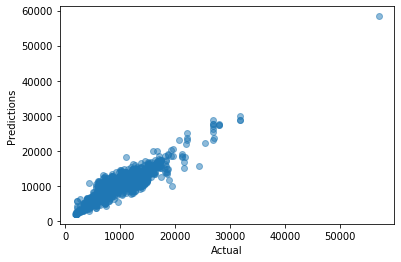

In [68]:
plt.scatter(y_test, extra_tree_predictions, alpha = 0.5)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.show()

In [69]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, extra_tree_predictions))
print('MSE:', metrics.mean_squared_error(y_test, extra_tree_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, extra_tree_predictions)))
print('R2score:', metrics.r2_score(y_test,extra_tree_predictions))

MAE: 1044.05051835449
MSE: 2449359.142163019
RMSE: 1565.0428563342982
R2score: 0.8791512353987148


In [70]:
extraTree_regressor.feature_importances_

array([2.56508294e-01, 1.26589489e-01, 5.82523134e-02, 2.04247239e-02,
       1.98116666e-02, 1.37563621e-01, 2.52940542e-02, 1.73636180e-02,
       1.01339373e-02, 1.74540332e-03, 1.85724701e-02, 1.41502121e-01,
       7.52562588e-02, 2.30546308e-02, 9.86525447e-04, 6.48074043e-03,
       4.47719019e-03, 7.59945676e-06, 6.51870305e-04, 6.42029757e-03,
       4.91069997e-03, 9.04870807e-03, 6.56689587e-03, 1.77722076e-02,
       9.95260062e-03, 6.52063507e-04])

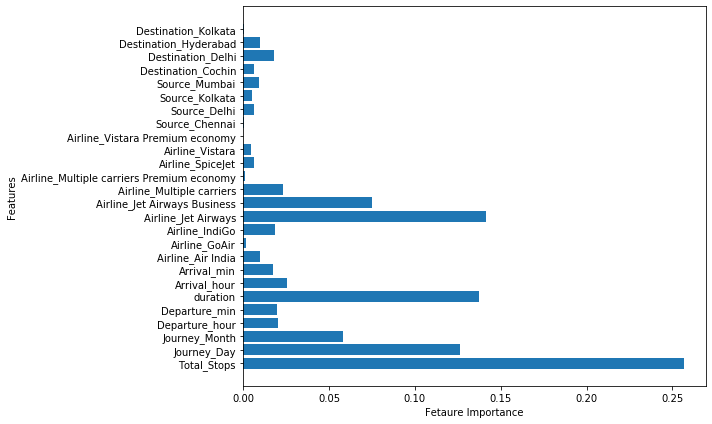

In [71]:
plt.figure(figsize=(10,6))
feature_imp_extra = pd.Series(extraTree_regressor.feature_importances_, index= X_test.columns)

plt.barh(feature_imp_extra.index, feature_imp_extra.values)

plt.xlabel('Fetaure Importance')

plt.ylabel('Features')


plt.tight_layout()

In [88]:
test_samples_extra_tree=extraTree_regressor.predict(test_data_df)
mysubmission = pd.DataFrame()
mysubmission['Price'] = test_samples_extra_tree
mysubmission.to_excel('my_submission.xlsx', index=False)

In [73]:
import pickle
pickle.dump(extraTree_regressor, open('flight_model.pkl','wb'))

In [102]:
flight_data_df.columns


Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Departure_hour', 'Departure_min', 'duration', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')